In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from sklearn import datasets
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


In [2]:
def display_image(image, title=''):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()



In [13]:
path1 = '/content/drive/MyDrive/Webelight/humans.jpg'
original_image1 = cv2.imread(path1)

path2 = '/content/drive/MyDrive/Webelight/cars.jpg'
original_image2 = cv2.imread(path2)



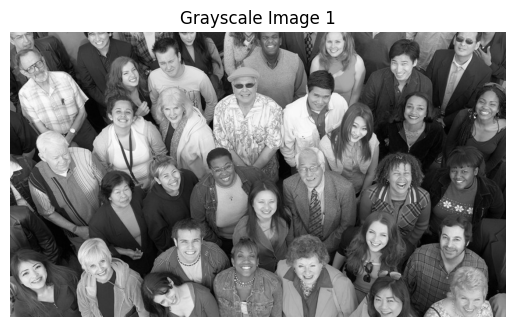

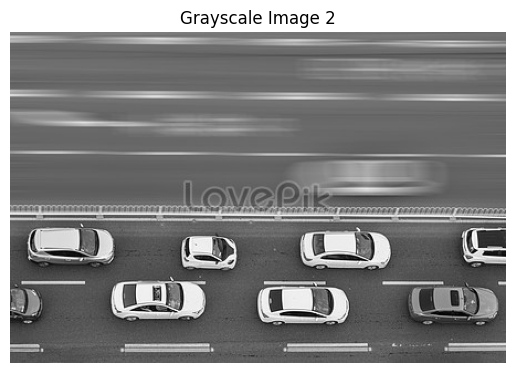

In [4]:
grayscale_image1 = cv2.cvtColor(original_image1, cv2.COLOR_BGR2GRAY)
grayscale_image2 = cv2.cvtColor(original_image2, cv2.COLOR_BGR2GRAY)
display_image(grayscale_image1, 'Grayscale Image 1')
display_image(grayscale_image2, 'Grayscale Image 2')



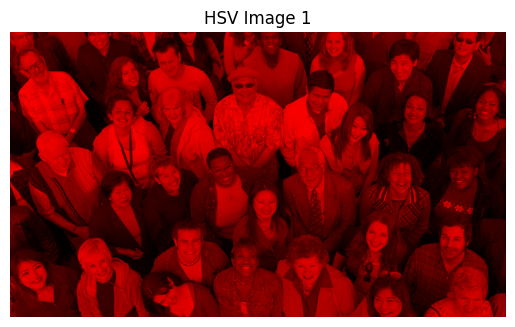

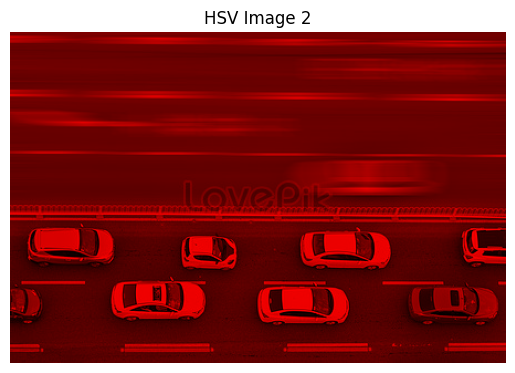

In [5]:
bgr_image1 = cv2.cvtColor(grayscale_image1, cv2.COLOR_GRAY2BGR)
hsv_image1 = cv2.cvtColor(bgr_image1, cv2.COLOR_BGR2HSV)

bgr_image2 = cv2.cvtColor(grayscale_image2, cv2.COLOR_GRAY2BGR)
hsv_image2 = cv2.cvtColor(bgr_image2, cv2.COLOR_BGR2HSV)

display_image(hsv_image1, 'HSV Image 1')
display_image(hsv_image2, 'HSV Image 2')




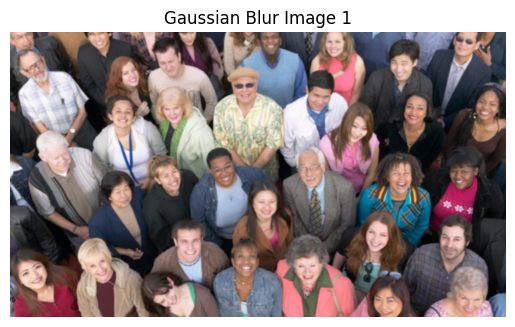

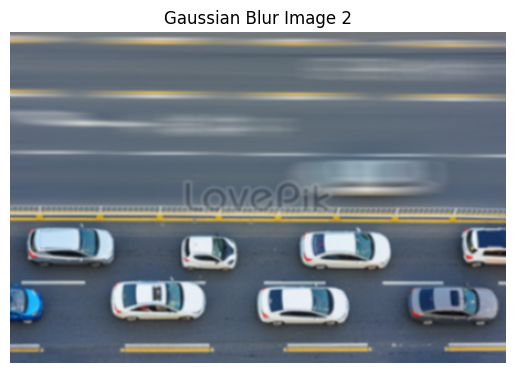

In [6]:
gaussian_blur_image1 = cv2.GaussianBlur(original_image1, (5, 5), 0)
gaussian_blur_image2 = cv2.GaussianBlur(original_image2, (5, 5), 0)
display_image(gaussian_blur_image1, 'Gaussian Blur Image 1')
display_image(gaussian_blur_image2, 'Gaussian Blur Image 2')



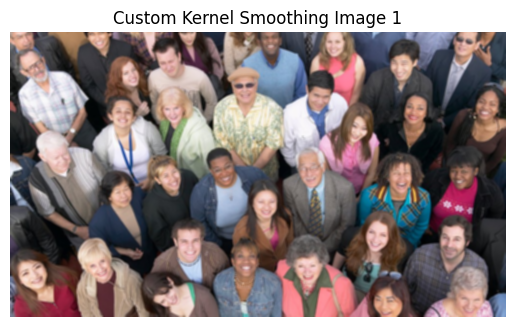

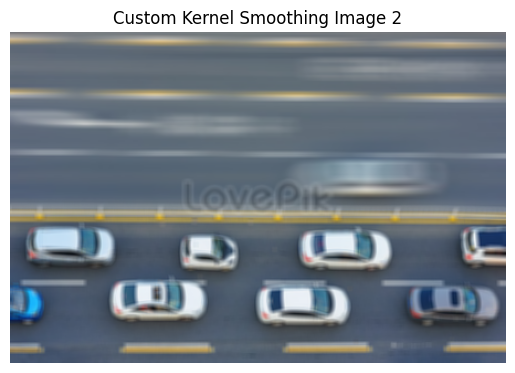

In [7]:
custom_kernel = np.ones((5, 5), np.float32) / 25
custom_smooth_image1 = cv2.filter2D(original_image1, -1, custom_kernel)
custom_smooth_image2 = cv2.filter2D(original_image2, -1, custom_kernel)
display_image(custom_smooth_image1, 'Custom Kernel Smoothing Image 1')
display_image(custom_smooth_image2, 'Custom Kernel Smoothing Image 2')



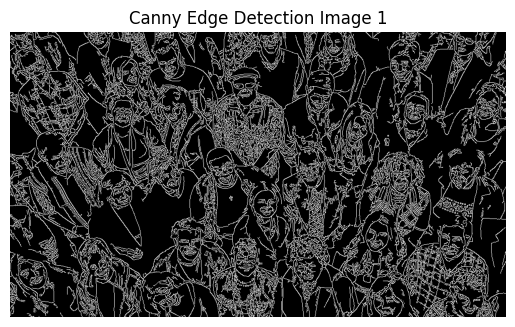

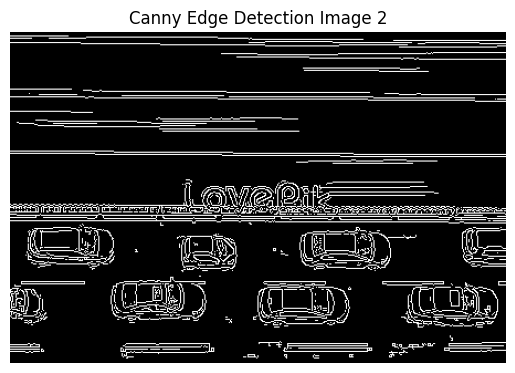

In [8]:
edges1 = cv2.Canny(grayscale_image1, 50, 150)
edges2 = cv2.Canny(grayscale_image2, 50, 150)
display_image(edges1, 'Canny Edge Detection Image 1')
display_image(edges2, 'Canny Edge Detection Image 2')



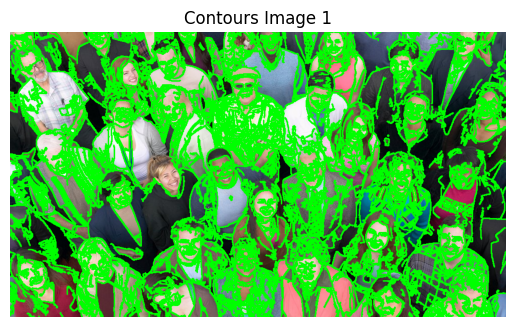

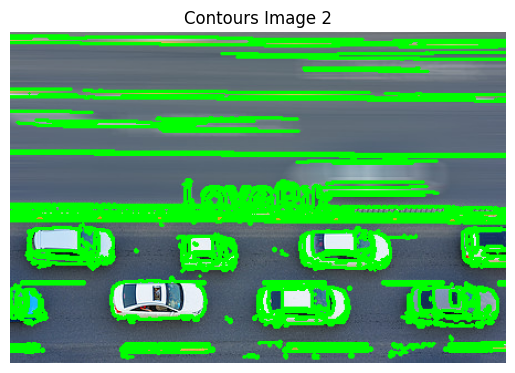

In [9]:
contours1, _ = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image1 = original_image1.copy()
cv2.drawContours(contour_image1, contours1, -1, (0, 255, 0), 2)
contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image2 = original_image2.copy()
cv2.drawContours(contour_image2, contours2, -1, (0, 255, 0), 2)
display_image(contour_image1, 'Contours Image 1')
display_image(contour_image2, 'Contours Image 2')



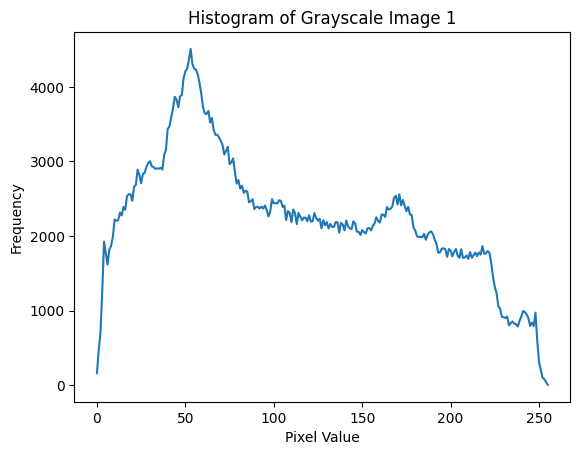

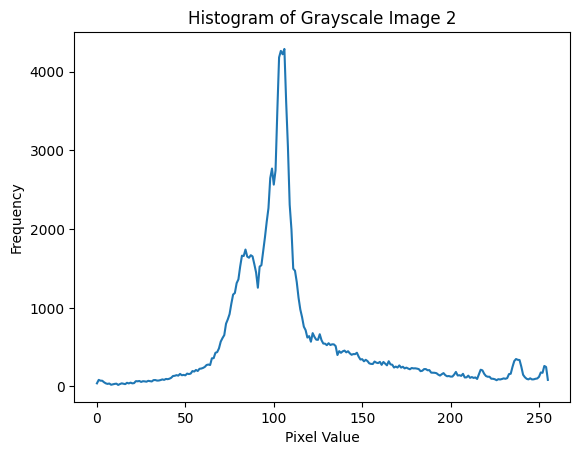

In [10]:
hist1 = cv2.calcHist([grayscale_image1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([grayscale_image2], [0], None, [256], [0, 256])
plt.plot(hist1)
plt.title('Histogram of Grayscale Image 1')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
plt.plot(hist2)
plt.title('Histogram of Grayscale Image 2')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



In [11]:
model = MobileNetV2(weights='imagenet')

def object_detection(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image.reshape(1, 224, 224, 3))


14536120/14536120 [==============================] - 1s 0us/step


In [12]:
object_detection(image=cv2.imread('/content/drive/MyDrive/Webelight/carsnew.jpg'))